## Signal Detection using Lomb-Scargle Periodogram
Within this part of the project we are analysing the a normalized signal. Unfortunately, the data recorded was not recorded in a regular interval so instead of using the traditional Fourier Transformation we will instead use a Lomb-Scargle Periodogram to find periodic signals in the data. Additionally note this data is artifically generated to show how the Lomb-Scargle Periodogram works and how interpreting the feedback can be tricky. 

Before we proceed we need to get an idea of the time interval between recordings so we create a quick histogram of the time intervals. This will allow us to get a better estimate of the possible periods that we can detect. 

Text(0, 0.5, 'Amount of observations')

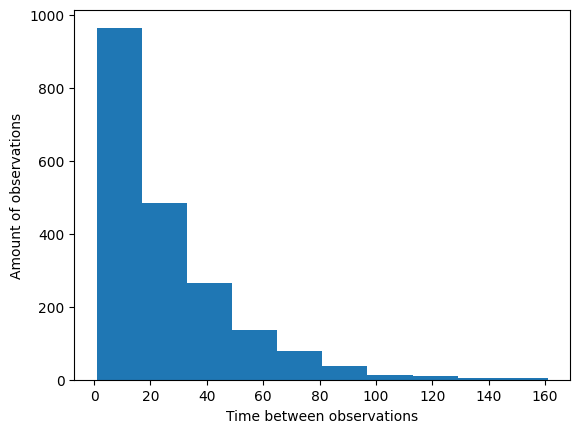

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.signal import lombscargle

data=pd.read_csv('data/prob2.csv')

diff_list = np.diff(data['time'])

plt.hist(diff_list)
plt.xlabel('Time between observations')
plt.ylabel('Amount of observations')

Now we are going to make the actual Lomb-Scargle periodogram. We need to specify the minimum and maximum period that we could detect. Looking at the histogram above we can see that the minimum period that we could detect would be around 1 and the maximum would be 50000(the length of the entire graph). We then convert these values into angular frequencies and use numpy's linespace function to get a large number of possible angular frequencies between the max and min. 
  
The formula from period to angular frequency is: $\omega = \frac{2\pi}{P}$ where $P$ is the period.

We then input the signal, time and the possible angular frequencies into the lombscargle function. Additionally we set precenter equal to True because the data is normalized and otherwise there would be a spike at zero.
  
Finally we plot the power spectrum created by the periodogram.

<Figure size 640x480 with 0 Axes>

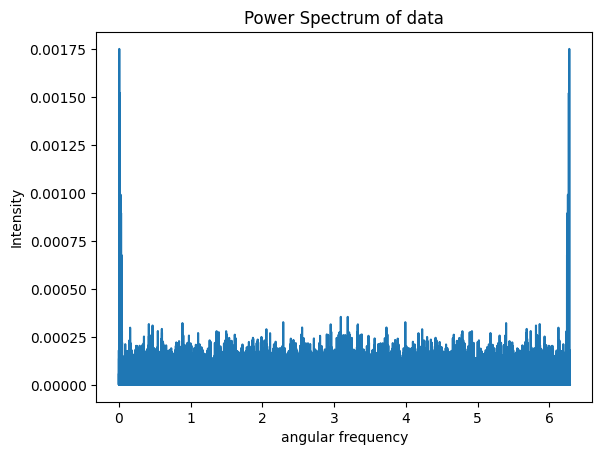

<Figure size 640x480 with 0 Axes>

In [ ]:
min_period=1
max_period=50000
afreq=2*np.pi*np.linspace(1/max_period,1/min_period,100000)

power=lombscargle(data['time'],data['signal'],afreq,precenter=True)
planet_afreq=afreq[np.argmax(power)]

plt.figure()
plt.plot(afreq,power)
plt.xlabel('Angular Frequency(rad/s)')
plt.ylabel('Intensity')
plt.title('Power Spectrum of data')
plt.figure()


It is suspicious that the two spikes in the periodogram are roughly $2\pi$ apart. The first spike is likely aliasing and the second spike is the actual period. It becomes even more clear when we zoom in on these spikes and see that they are roughly symmetrical. 

1000.0098001940438


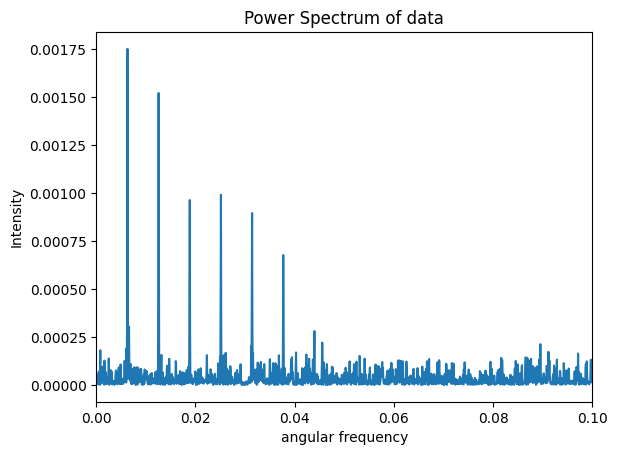

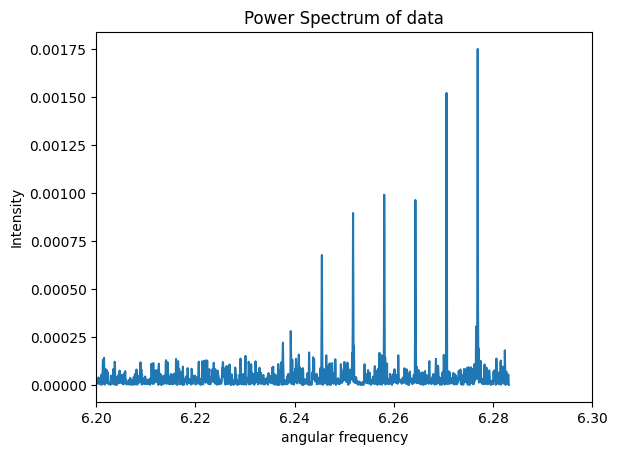

In [ ]:
plt.plot(afreq,power)
plt.xlabel('angular frequency')
plt.ylabel('Intensity')
plt.title('Power Spectrum of data')
plt.xlim(0,0.1)
plt.figure()
plt.plot(afreq,power)
plt.xlabel('Angular Frequency(rads/s)')
plt.ylabel('Intensity')
plt.title('Power Spectrum of data')
plt.xlim(6.2,6.3)
planet_period=(2*np.pi)/planet_afreq
print(planet_period)

To further examine the data we can "fold" the data by different periods to see which one better first we fold the data by the period of the angular frequency of the highest peak. We additionally plot the rolling average of the data to more clearly see the trend. We can see the trend but it is not very sinusoidal. It actually is a sharp drop and then a sharp increase roughly every thousand seconds. This illustrates the dangers of using periodograms, they can easily tell you how often the pattern repeats but not actually what the pattern is. You always need to look further into the data. 

nan

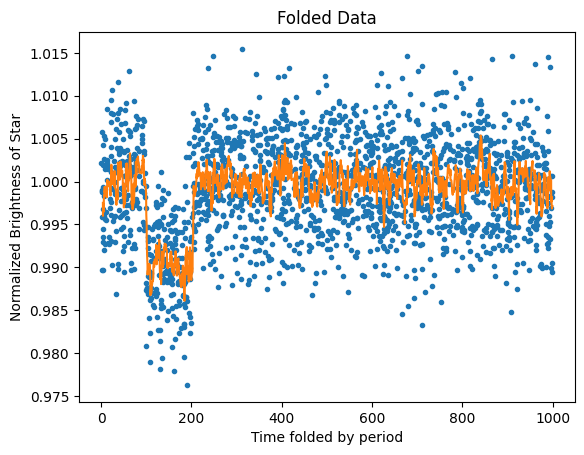

In [16]:
data['phase']=(data['time']%planet_period)
plt.plot(data['phase'],data['signal'],'.')


data=data.sort_values('phase')
data['rolling']=data.signal.rolling(10).mean()

plt.plot(data['phase'],data['rolling'],'-')
plt.xlabel('Time folded by period')
plt.ylabel('Normalized Brightness of Star')
plt.title('Folded Data')
data['rolling'].loc[(data['phase']<0.22)&(data['phase']>0.1)].mean()